### Matrix plots - Heat Maps

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set seaborn defaults

sns.set()

In [3]:
np.random.seed(123)
uniform_data = np.random.randint(60,100,(5,15))
uniform_data

array([[62, 88, 94, 98, 77, 79, 82, 93, 92, 69, 92, 92, 85, 79, 74],
       [96, 92, 76, 64, 63, 62, 80, 99, 62, 80, 67, 95, 88, 98, 93],
       [81, 90, 87, 94, 93, 72, 63, 65, 60, 71, 94, 70, 82, 73, 78],
       [96, 75, 87, 90, 66, 86, 76, 66, 74, 99, 71, 67, 61, 97, 85],
       [80, 72, 78, 77, 61, 87, 82, 63, 63, 71, 81, 85, 99, 94, 63]])

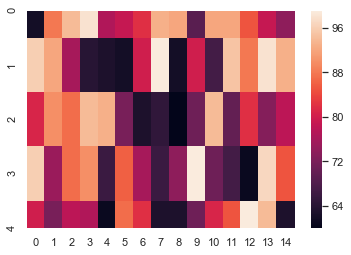

In [5]:
# Plot rectangular data as a color-encoded matrix.
sns.heatmap(uniform_data);

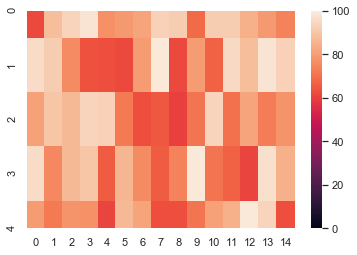

In [8]:
# vmin, vmax:  Values to anchor the colormap, otherwise they are inferred from the data and other keyword arguments.
sns.heatmap(uniform_data, vmin=0, vmax=100);

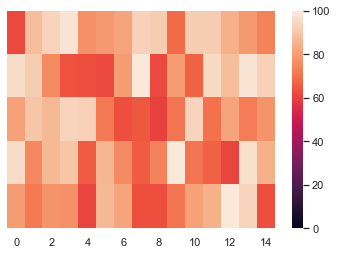

In [9]:
sns.heatmap(uniform_data, 
            xticklabels=2, yticklabels=False,
            vmin=0, vmax=100);

In [10]:
uniform_data

array([[62, 88, 94, 98, 77, 79, 82, 93, 92, 69, 92, 92, 85, 79, 74],
       [96, 92, 76, 64, 63, 62, 80, 99, 62, 80, 67, 95, 88, 98, 93],
       [81, 90, 87, 94, 93, 72, 63, 65, 60, 71, 94, 70, 82, 73, 78],
       [96, 75, 87, 90, 66, 86, 76, 66, 74, 99, 71, 67, 61, 97, 85],
       [80, 72, 78, 77, 61, 87, 82, 63, 63, 71, 81, 85, 99, 94, 63]])

In [11]:
mask = np.where(uniform_data < 90, True, False)
mask

array([[ True,  True, False, False,  True,  True,  True, False, False,
         True, False, False,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True, False,  True,
         True,  True, False,  True, False, False],
       [ True, False,  True, False, False,  True,  True,  True,  True,
         True, False,  True,  True,  True,  True],
       [False,  True,  True, False,  True,  True,  True,  True,  True,
        False,  True,  True,  True, False,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True, False, False,  True]])

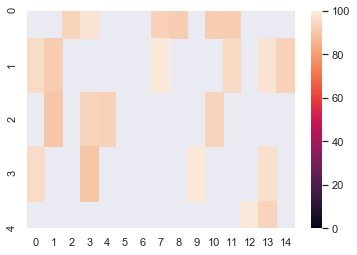

In [12]:
# Do not show data where mask is True

sns.heatmap(uniform_data, mask=mask, vmin=0, vmax=100);

In [13]:
np.random.seed(123)
normal_data = np.round(100*np.random.randn(5,5))
normal_data

array([[-109.,  100.,   28., -151.,  -58.],
       [ 165., -243.,  -43.,  127.,  -87.],
       [ -68.,   -9.,  149.,  -64.,  -44.],
       [ -43.,  221.,  219.,  100.,   39.],
       [  74.,  149.,  -94.,  118., -125.]])

In [14]:
np.min(normal_data), np.max(normal_data)

(-243.0, 221.0)

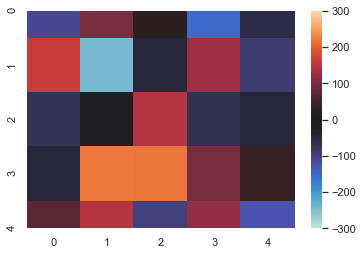

In [15]:
# Plot with heatmap centered on 0 with a diverging colormap

sns.heatmap(normal_data, center=0, 
            vmin=-300, vmax=300);

In [16]:
# Mask Upper triangle

# np.triu_indices_from(arr):  Return the indices for the upper-triangle of arr.

mask = np.zeros_like(normal_data)
mask[np.triu_indices_from(mask)] = True
mask

array([[1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.]])

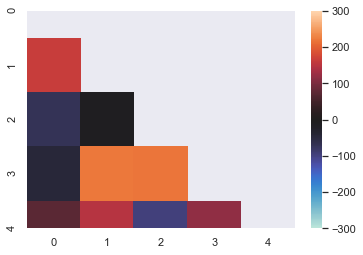

In [18]:
sns.heatmap(normal_data, mask=mask, center=0, 
            vmin=-300, vmax=300);

In [56]:
# Case study

flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [57]:
# Convert to wide form

# Return reshaped DataFrame organized by given index / column values.
flights = flights.pivot(index="month", columns="year", values="passengers")
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


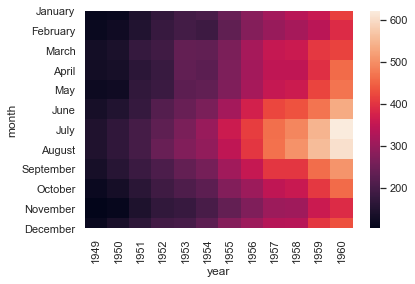

In [58]:
sns.heatmap(flights);

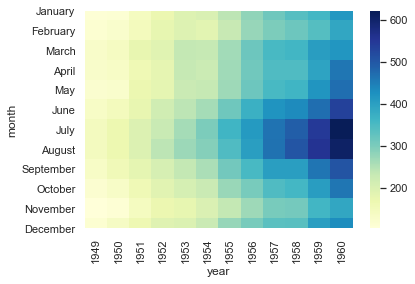

In [59]:
sns.heatmap(flights, cmap="YlGnBu");

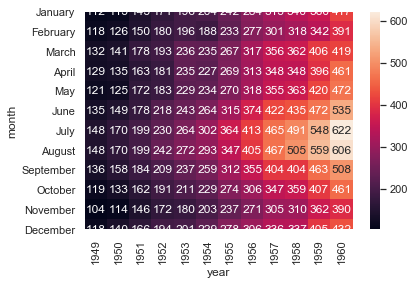

In [60]:
sns.heatmap(flights, annot=True, fmt="d");

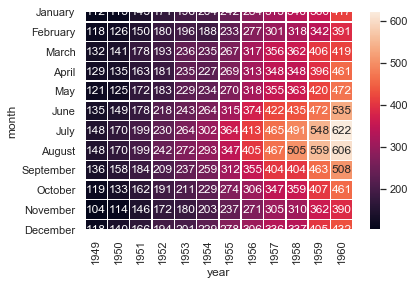

In [61]:
sns.heatmap(flights, annot=True, fmt="d", linewidths=0.4);

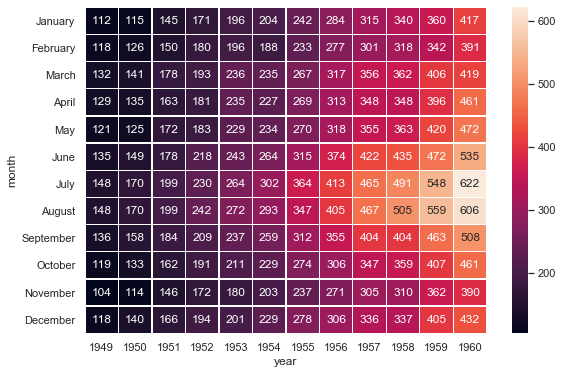

In [62]:
# Bug fix to show cut off portions of top and bottom

fig, ax = plt.subplots(figsize=(9, 6))

sns.heatmap(flights, annot=True, fmt="d", linewidths=0.4, ax=ax)

bottom_y, top_y = plt.ylim() 
bottom_y += 0.5 
top_y -= 0.5 
plt.ylim(bottom_y, top_y)

plt.show() 